<a href="https://colab.research.google.com/github/catchmoosa/SBERT_Keyword_Extraction/blob/main/Keyword_Extraction_SBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.3MB 5.2MB/s 
     |████████████████████████████████| 3.3MB 30.2MB/s 
     |████████████████████████████████| 901kB 46.8MB/s 


In [ ]:
!pip install sentence_transformers

     |████████████████████████████████| 81kB 3.4MB/s 
     |████████████████████████████████| 1.2MB 9.5MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-1.1.1-cp37-none-any.whl size=123338 sha256=b4f0f38414be6c5e8958a8122631817445da8b47728efc8df37bbdc857cad076
  Stored in directory: /root/.cache/pip/wheels/5e/89/29/45e45adc162b50f97f71801e8b07947c9cfe2b3ae7dbf37896
Successfully built sentence-transformers


In [ ]:
import torch
from transformers import BertTokenizer, BertModel, BertForMaskedLM

## Sentence BERT

A sentence BERT of SBERT takes the embeddings from a BERT Model and then fed into a Siamese Network. A Siamese network consists of two identical neural networks, each taking one of the two input vectors. The last layers of the two networks are then fed to a loss function , which calculates the similarity between the two vectors. These networks have been very popular in Image recognition tasks but here we see that they are useful in NLP tasks as well.


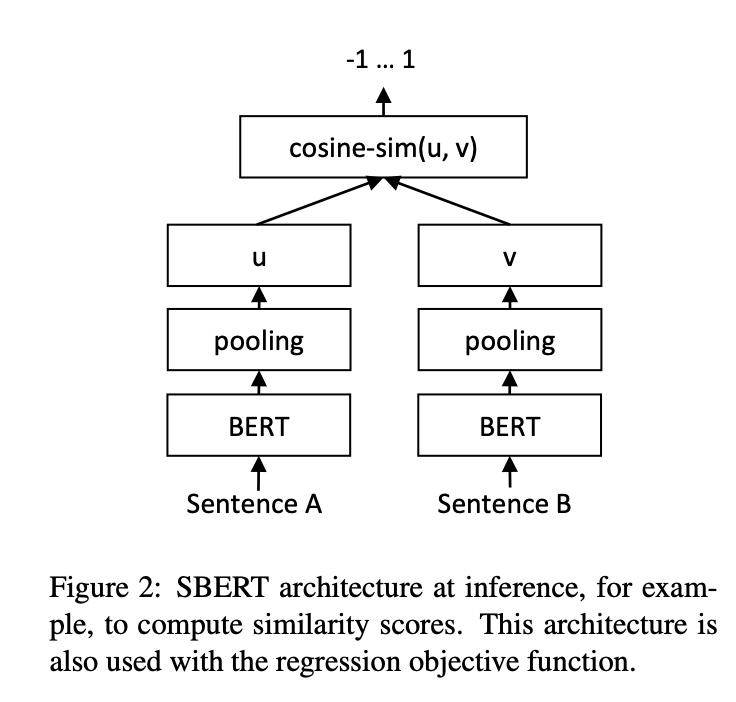

We start by understanding the problem. Since the articles are much larger than the query, the problem becomes an asymmetric semantic search problem. 

The documentation under Sentence Transformer documentation suggests the use of 'msmarco-distilbert-base-v2' for asymmetric search probelms, which is what we have used here.

In [ ]:
from sentence_transformers import SentenceTransformer
import scipy.spatial
# embedder = SentenceTransformer('bert-base-nli-mean-tokens')
embedder = SentenceTransformer('msmarco-distilbert-base-v2')

lst_corpus = ['The leading search engines, such as Google, Bing and Yahoo!, use crawlers to find pages for their algorithmic search results. Pages that are linked from other search engine indexed pages do not need to be submitted because they are found automatically. The Yahoo! Directory and DMOZ, two major directories which closed in 2014 and 2017 respectively, both required manual submission and human editorial review.[37] Google offers Google Search Console, for which an XML Sitemap feed can be created and submitted for free to ensure that all pages are found, especially pages that are not discoverable by automatically following links[38] in addition to their URL submission console.[39] Yahoo! formerly operated a paid submission service that guaranteed crawling for a cost per click;[40] however, this practice was discontinued in 2009. Search engine crawlers may look at a number of different factors when crawling a site. Not every page is indexed by the search engines. The distance of pages from the root directory of a site may also be a factor in whether or not pages get crawled.[41] Today, most people are searching on Google using a mobile device.[42] In November 2016, Google announced a major change to the way crawling websites and started to make their index mobile-first, which means the mobile version of a given website becomes the starting point for what Google includes in their index.[43] In May 2019, Google updated the rendering engine of their crawler to be the latest version of Chromium (74 at the time of the announcement). Google indicated that they would regularly update the Chromium rendering engine to the latest version.[44] In December 2019, Google began updating the User-Agent string of their crawler to reflect the latest Chrome version used by their rendering service. The delay was to allow webmasters time to update their code that responded to particular bot User-Agent strings. Google ran evaluations and felt confident the impact would be minor.[45]',
            'SEO techniques can be classified into two broad categories: techniques that search engine companies recommend as part of good design ("white hat"), and those techniques of which search engines do not approve ("black hat"). The search engines attempt to minimize the effect of the latter, among them spamdexing. Industry commentators have classified these methods, and the practitioners who employ them, as either white hat SEO, or black hat SEO.[49] White hats tend to produce results that last a long time, whereas black hats anticipate that their sites may eventually be banned either temporarily or permanently once the search engines discover what they are doing.[50] An SEO technique is considered white hat if it conforms to the search engines guidelines and involves no deception. As the search engine guidelines[14][15][51] are not written as a series of rules or commandments, this is an important distinction to note. White hat SEO is not just about following guidelines but is about ensuring that the content a search engine indexes and subsequently ranks is the same content a user will see. White hat advice is generally summed up as creating content for users, not for search engines, and then making that content easily accessible to the online spider algorithms, rather than attempting to trick the algorithm from its intended purpose. White hat SEO is in many ways similar to web development that promotes accessibility,[52] although the two are not identical. Black hat SEO attempts to improve rankings in ways that are disapproved of by the search engines, or involve deception. One black hat technique uses hidden text, either as text colored similar to the background, in an invisible div, or positioned off screen. Another method gives a different page depending on whether the page is being requested by a human visitor or a search engine, a technique known as cloaking. Another category sometimes used is grey hat SEO. This is in between black hat and white hat approaches, where the methods employed avoid the site being penalized but do not act in producing the best content for users. Grey hat SEO is entirely focused on improving search engine rankings. Search engines may penalize sites they discover using black or grey hat methods, either by reducing their rankings or eliminating their listings from their databases altogether. Such penalties can be applied either automatically by the search engines algorithms, or by a manual site review. One example was the February 2006 Google removal of both BMW Germany and Ricoh Germany for use of deceptive practices.[53] Both companies, however, quickly apologized, fixed the offending pages, and were restored to Googles search engine results page.[54]',
          'SEO is not an appropriate strategy for every website, and other Internet marketing strategies can be more effective, such as paid advertising through pay per click (PPC) campaigns, depending on the site operators goals. Search engine marketing (SEM) is the practice of designing, running and optimizing search engine ad campaigns. Its difference from SEO is most simply depicted as the difference between paid and unpaid priority ranking in search results. SEM focuses on prominence more so than relevance; website developers should regard SEM with the utmost importance with consideration to visibility as most navigate to the primary listings of their search.[55] A successful Internet marketing campaign may also depend upon building high-quality web pages to engage and persuade internet users, setting up analytics programs to enable site owners to measure results, and improving a sites conversion rate.[56] In November 2015, Google released a full 160-page version of its Search Quality Rating Guidelines to the public,[57] which revealed a shift in their focus towards "usefulness" and mobile local search. In recent years the mobile market has exploded, overtaking the use of desktops, as shown in by StatCounter in October 2016 where they analyzed 2.5 million websites and found that 51.3% of the pages were loaded by a mobile device.[58] Google has been one of the companies that are utilizing the popularity of mobile usage by encouraging websites to use their Google Search Console, the Mobile-Friendly Test, which allows companies to measure up their website to the search engine results and determine how user-friendly their websites are. SEO may generate an adequate return on investment. However, search engines are not paid for organic search traffic, their algorithms change, and there are no guarantees of continued referrals. Due to this lack of guarantee and the uncertainty, a business that relies heavily on search engine traffic can suffer major losses if the search engines stop sending visitors.[59] Search engines can change their algorithms, impacting a websites search engine ranking, possibly resulting in a serious loss of traffic. According to Googles CEO, Eric Schmidt, in 2010, Google made over 500 algorithm changes – almost 1.5 per day.[60] It is considered a wise business practice for website operators to liberate themselves from dependence on search engine traffic.[61] In addition to accessibility in terms of web crawlers (addressed above), user web accessibility has become increasingly important for SEO.',
          """A vulnerability is a weakness in design, implementation, operation, or internal control. Most of the vulnerabilities that have been discovered are documented in the Common Vulnerabilities and Exposures (CVE) database. An exploitable vulnerability is one for which at least one working attack or "exploit" exists.[11] Vulnerabilities can be researched, reverse-engineered, hunted, or exploited using automated tools or customized scripts.[12][13] To secure a computer system, it is important to understand the attacks that can be made against it, and these threats can typically be classified into one of these categories below: A backdoor in a computer system, a cryptosystem or an algorithm, is any secret method of bypassing normal authentication or security controls. They may exist for many reasons, including by original design or from poor configuration. They may have been added by an authorized party to allow some legitimate access, or by an attacker for malicious reasons; but regardless of the motives for their existence, they create a vulnerability. Backdoors can be very hard to detect, and detection of backdoors are usually discovered by someone who has access to application source code or intimate knowledge of Operating System of the computer. Denial of service attacks (DoS) are designed to make a machine or network resource unavailable to its intended users.[14] Attackers can deny service to individual victims, such as by deliberately entering a wrong password enough consecutive times to cause the victim's account to be locked, or they may overload the capabilities of a machine or network and block all users at once. While a network attack from a single IP address can be blocked by adding a new firewall rule, many forms of Distributed denial of service (DDoS) attacks are possible, where the attack comes from a large number of points – and defending is much more difficult. Such attacks can originate from the zombie computers of a botnet or from a range of other possible techniques, including reflection and amplification attacks, where innocent systems are fooled into sending traffic to the victim. An unauthorized user gaining physical access to a computer is most likely able to directly copy data from it. They may also compromise security by making operating system modifications, installing software worms, keyloggers, covert listening devices or using wireless microphone. Even when the system is protected by standard security measures, these may be bypassed by booting another operating system or tool from a CD-ROM or other bootable media. Disk encryption and Trusted Platform Module are designed to prevent these attacks. Eavesdropping is the act of surreptitiously listening to a private computer "conversation" (communication), typically between hosts on a network. For instance, programs such as Carnivore and NarusInSight have been used by the FBI and NSA to eavesdrop on the systems of internet service providers. Even machines that operate as a closed system (i.e., with no contact to the outside world) can be eavesdropped upon via monitoring the faint electromagnetic transmissions generated by the hardware; TEMPEST is a specification by the NSA referring to these attacks.""",
          """DNA is a long polymer made from repeating units called nucleotides, each of which is usually symbolized by a single letter: either A, T, C, or G.[6][7] Chargaff's rules state that DNA from any species of any organism should have a 1:1 protein stoichiometry ratio (base pair rule) of purine and pyrimidine bases (i.e., A+T=G+C) and, more specifically, that the amount of guanine should be equal to cytosine and the amount of adenine should be equal to thymine. The structure of DNA is dynamic along its length, being capable of coiling into tight loops and other shapes.[8] In all species it is composed of two helical chains, bound to each other by hydrogen bonds. Both chains are coiled around the same axis, and have the same pitch of 34 angstroms (Å) (3.4 nanometres). The pair of chains have a radius of 10 angstroms (1.0 nanometre).[9] According to another study, when measured in a different solution, the DNA chain measured 22 to 26 angstroms wide (2.2 to 2.6 nanometres), and one nucleotide unit measured 3.3 Å (0.33 nm) long.[10] Although each individual nucleotide is very small, a DNA polymer can be very large and may contain hundreds of millions of nucleotides, such as in chromosome 1. Chromosome 1 is the largest human chromosome with approximately 220 million base pairs, and would be 85 mm long if straightened. DNA does not usually exist as a single strand, but instead as a pair of strands that are held tightly together.[9][12] These two long strands coil around each other, in the shape of a double helix. The nucleotide contains both a segment of the backbone of the molecule (which holds the chain together) and a nucleobase (which interacts with the other DNA strand in the helix). A nucleobase linked to a sugar is called a nucleoside, and a base linked to a sugar and to one or more phosphate groups is called a nucleotide. A biopolymer comprising multiple linked nucleotides (as in DNA) is called a polynucleotide.[13] The backbone of the DNA strand is made from alternating phosphate and sugar groups.[14] The sugar in DNA is 2-deoxyribose, which is a pentose (five-carbon) sugar. The sugars are joined together by phosphate groups that form phosphodiester bonds between the third and fifth carbon atoms of adjacent sugar rings. These are known as the 3′-end (three prime end), and 5′-end (five prime end) carbons, the prime symbol being used to distinguish these carbon atoms from those of the base to which the deoxyribose forms a glycosidic bond. Therefore, any DNA strand normally has one end at which there is a phosphate group attached to the 5′ carbon of a ribose (the 5′ phosphoryl) and another end at which there is a free hydroxyl group attached to the 3′ carbon of a ribose (the 3′ hydroxyl). The orientation of the 3′ and 5′ carbons along the sugar-phosphate backbone confers directionality (sometimes called polarity) to each DNA strand. In a nucleic acid double helix, the direction of the nucleotides in one strand is opposite to their direction in the other strand: the strands are antiparallel. The asymmetric ends of DNA strands are said to have a directionality of five prime end (5′ ), and three prime end (3′), with the 5′ end having a terminal phosphate group and the 3′ end a terminal hydroxyl group. One major difference between DNA and RNA is the sugar, with the 2-deoxyribose in DNA being replaced by the alternative pentose sugar ribose in RNA.[12] The DNA double helix is stabilized primarily by two forces: hydrogen bonds between nucleotides and base-stacking interactions among aromatic nucleobases.[16] The four bases found in DNA are adenine (A), cytosine (C), guanine (G) and thymine (T). These four bases are attached to the sugar-phosphate to form the complete nucleotide, as shown for adenosine monophosphate. Adenine pairs with thymine and guanine pairs with cytosine, forming A-T and G-C base pairs.[17][18]""",
          """Twin helical strands form the DNA backbone. Another double helix may be found tracing the spaces, or grooves, between the strands. These voids are adjacent to the base pairs and may provide a binding site. As the strands are not symmetrically located with respect to each other, the grooves are unequally sized. One groove, the major groove, is 22 angstroms (Å) wide and the other, the minor groove, is 12 Å wide.[24] The width of the major groove means that the edges of the bases are more accessible in the major groove than in the minor groove. As a result, proteins such as transcription factors that can bind to specific sequences in double-stranded DNA usually make contact with the sides of the bases exposed in the major groove.[25] This situation varies in unusual conformations of DNA within the cell (see below), but the major and minor grooves are always named to reflect the differences in size that would be seen if the DNA is twisted back into the ordinary B form. In a DNA double helix, each type of nucleobase on one strand bonds with just one type of nucleobase on the other strand. This is called complementary base pairing. Purines form hydrogen bonds to pyrimidines, with adenine bonding only to thymine in two hydrogen bonds, and cytosine bonding only to guanine in three hydrogen bonds. This arrangement of two nucleotides binding together across the double helix (from six-carbon ring to six-carbon ring) is called a Watson-Crick base pair. DNA with high GC-content is more stable than DNA with low GC-content. A Hoogsteen base pair (hydrogen bonding the 6-carbon ring to the 5-carbon ring) is a rare variation of base-pairing.[26] As hydrogen bonds are not covalent, they can be broken and rejoined relatively easily. The two strands of DNA in a double helix can thus be pulled apart like a zipper, either by a mechanical force or high temperature.[27] As a result of this base pair complementarity, all the information in the double-stranded sequence of a DNA helix is duplicated on each strand, which is vital in DNA replication. This reversible and specific interaction between complementary base pairs is critical for all the functions of DNA in organisms.[7] As noted above, most DNA molecules are actually two polymer strands, bound together in a helical fashion by noncovalent bonds; this double-stranded (dsDNA) structure is maintained largely by the intrastrand base stacking interactions, which are strongest for G,C stacks. The two strands can come apart—a process known as melting—to form two single-stranded DNA (ssDNA) molecules. Melting occurs at high temperature, low salt and high pH (low pH also melts DNA, but since DNA is unstable due to acid depurination, low pH is rarely used). The stability of the dsDNA form depends not only on the GC-content (% G,C basepairs) but also on sequence (since stacking is sequence specific) and also length (longer molecules are more stable). The stability can be measured in various ways; a common way is the "melting temperature", which is the temperature at which 50% of the ds molecules are converted to ss molecules; melting temperature is dependent on ionic strength and the concentration of DNA. As a result, it is both the percentage of GC base pairs and the overall length of a DNA double helix that determines the strength of the association between the two strands of DNA. Long DNA helices with a high GC-content have stronger-interacting strands, while short helices with high AT content have weaker-interacting strands.[28] In biology, parts of the DNA double helix that need to separate easily, such as the TATAAT Pribnow box in some promoters, tend to have a high AT content, making the strands easier to pull apart.[29] In the laboratory, the strength of this interaction can be measured by finding the temperature necessary to break half of the hydrogen bonds, their melting temperature (also called Tm value). When all the base pairs in a DNA double helix melt, the strands separate and exist in solution as two entirely independent molecules. These single-stranded DNA molecules have no single common shape, but some conformations are more stable than others.[30]""",
          'Sachin Tendulkar is a great player.',
          'Sholay is an Indian classic film',
          ]
test_sentences = ["Computer Security.", "dna", "search engine optimization", 'I like hindi movies']

corpus_embeddings = embedder.encode(lst_corpus)
query_embeddings = embedder.encode(test_sentences)
 

In [ ]:
closest_n = 5
for query, query_embedding in zip(test_sentences, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], corpus_embeddings, "cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop %s most similar articles in corpus:\n" % closest_n)

    for idx, distance in results[0:closest_n]:
        print(lst_corpus[idx][:40].strip(), "...   (Score: %.4f)" % (1-distance))





Query: Computer Security.

Top 5 most similar articles in corpus:

A vulnerability is a weakness in design, ...   (Score: 0.4263)
DNA is a long polymer made from repeatin ...   (Score: 0.0958)
Sachin Tendulkar is a great player. ...   (Score: 0.0411)
Twin helical strands form the DNA backbo ...   (Score: 0.0160)
The leading search engines, such as Goog ...   (Score: 0.0052)




Query: dna

Top 5 most similar articles in corpus:

DNA is a long polymer made from repeatin ...   (Score: 0.6757)
Twin helical strands form the DNA backbo ...   (Score: 0.4299)
Sholay is an Indian classic film ...   (Score: 0.0642)
Sachin Tendulkar is a great player. ...   (Score: 0.0534)
A vulnerability is a weakness in design, ...   (Score: -0.0164)




Query: search engine optimization

Top 5 most similar articles in corpus:

The leading search engines, such as Goog ...   (Score: 0.4817)
SEO is not an appropriate strategy for e ...   (Score: 0.3885)
SEO techniques can be classified into tw ...   (Score: 

## Using YAKE + SentenceBERT to extract keywords

Yet Another Keyword Extractor (Yake) library selects the most important keywords using the text statistical features method from the article. With the help of YAKE, we can control the extracted keyword word count and other features.


For our example, we take the highest ranked DNA article and try ti extract keywords based on the query.

In [ ]:
!pip install yake

     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 92kB 4.1MB/s 
  Created wheel for segtok: filename=segtok-1.5.10-cp37-none-any.whl size=25019 sha256=2cbbe0ca92390e5182b56d213df30e61dafbceebf77a56d1f3e5dad23e8704a0
  Stored in directory: /root/.cache/pip/wheels/b4/39/f6/9ca1c5cabde964d728023b5751c3a206a5c8cc40252321fb6b
Successfully built segtok


In [ ]:
import yake 

In [ ]:
kw_extractor = yake.KeywordExtractor()
text = lst_corpus[4] ## Taking the highest ranked dna article
language = "en"

In [ ]:
max_ngram_size = 4
deduplication_threshold = 0.9
numOfKeywords = 50
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text)

In [ ]:
lst_corpus =[]

for kw in keywords:
    print(kw)
    lst_corpus.append(kw[0])


('DNA from any species', -1.1122947854064473)
('Chargaff rules state', 0.003312986826854745)
('DNA', 0.008135937388178261)
('Chargaff rules', 0.012117485554962693)
('DNA strand', 0.013293562645165994)
('protein stoichiometry ratio', 0.019813912179559315)
('rules state that DNA', 0.029106885846243633)
('DNA chain measured', 0.03237738392192245)
('base pair rule', 0.032496580678056844)
('purine and pyrimidine bases', 0.03511207480347448)
('repeating units called nucleotides', 0.037744850521003626)
('rules state', 0.04654455601245339)
('sugar', 0.049642911288462)
('end', 0.051401720978938484)
('strand', 0.052149072223155235)
('DNA chain', 0.05229533346671649)
('prime end', 0.06216619474171157)
('DNA double helix', 0.06248201868862541)
('pair rule', 0.06522223061688723)
('DNA polymer', 0.0664339693151923)
('stoichiometry ratio', 0.06881978181862174)
('Chargaff', 0.06941361306096343)
('protein stoichiometry', 0.07122442292458746)
('purine and pyrimidine', 0.07122442292458746)
('repeating un

In [ ]:
keywords[0][0]

'DNA from any species'

We now have to extract topics and keywords from these most relevant articles.

Finally, we our search problem becomes symmetric, i.e, the size of our query matches that of the keyword. The documentation suggests using a couple of models, a popular option being 'paraphrase-distilroberta-base-v1'.

In [ ]:
symmetric_embedder = SentenceTransformer('paraphrase-distilroberta-base-v1')

 
test_sentences = ["dna"]

corpus_embeddings = embedder.encode(lst_corpus)
query_embeddings = embedder.encode(test_sentences)
 

In [ ]:
closest_n = 20
for query, query_embedding in zip(test_sentences, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], corpus_embeddings, "cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop %s most similar keywords extracted:\n" % closest_n)

    for idx, distance in results[0:closest_n]:
        print(lst_corpus[idx].strip(), "(Score: %.4f)" % (1-distance))





Query: dna

Top 20 most similar keywords extracted:

DNA (Score: 1.0000)
rules state that DNA (Score: 0.7128)
DNA from any species (Score: 0.6856)
DNA strand is made (Score: 0.6847)
DNA strand (Score: 0.6772)
DNA chain (Score: 0.6713)
DNA polymer (Score: 0.6701)
DNA double (Score: 0.6357)
DNA double helix (Score: 0.5780)
DNA chain measured (Score: 0.5692)
nucleotides (Score: 0.5119)
ends of DNA strands (Score: 0.4482)
units called nucleotides (Score: 0.3788)
double helix (Score: 0.3448)
pyrimidine bases (Score: 0.3364)
repeating units called nucleotides (Score: 0.3354)
strand (Score: 0.3101)
helix (Score: 0.3041)
base pair rule (Score: 0.3004)
purine and pyrimidine bases (Score: 0.2825)
